#  <span style="color:brown">Problem 16

## <span style="color:blue">Problem statment

The content, tone, and format of job bulletins can influence the quality of the applicant pool. Overly-specific job requirements may discourage diversity. The Los Angeles Mayor’s Office wants to reimagine the city’s job bulletins by using text analysis to identify needed improvements, in order to achive this use the daatset in the relative diretcotry ./Datasets/la_jobs.csv, and this is the decomentation for the useful columns you should use:

- FILE_NAME: The bulletins file name.
- JOB_CLASS_TITLE: Job title.
- JOB_CLASS_NO: Job number.
- JOB_DUTIES: The duties of this job.
- EDUCATION_YEARS: Number of education yeras needed to apply for this job.
- SCHOOL_TYPE: The type of school you need to study in.
- EDUCATION_MAJOR: The eductaion major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job .
- FULL_TIME_PART_TIME: If the job is full time or part time or both.
- EXP_JOB_CLASS_TITLE: The title of the job you must have experience in before applying in this job.
- COURSE_COUNT: Number of courses neede to apply for this job.
- COURSE_LENGTH: The course length in years or months.
- COURSE_SUBJECT: The course subject tha is needed to be accepted in this job.
- DRIVERS_LICENSE_REQ: Is driver license required or not for this job.
- EXAM_TYPE: Type of exams neededin the hiring process.
- ENTRY_SALARY: Salary range in this job.
- OPEN_DATE: Date at it the job bulliten got open.
- REQUIREMENT_SET_TEXT: The requirments set need for this job in points.

    

#### The goal is to answer the following questions
 

In [59]:
data = pd.read_csv('Datasets/la_jobs.csv',index_col = 0)
data

,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,REQUIREMENT_SET_ID,REQUIREMENT_SUBSET_ID,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,...,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,ADDTL_LIC,EXAM_TYPE,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE,REQUIREMENT_SET_TEXT,REQUIREMENT_SUBSET_TEXT,REQUIREMENT_CONJUNCTION
0,311 DIRECTOR 9206 041814.txt,311 Director,9206,1.0,-,A 311 Director is responsible for the successf...,-,-,-,1.0,...,-,-,-,OPEN_INT_PROM,"$125,175 to $155,514",-,04-18-14,One year of full-time paid experience as a Sen...,-,or
1,311 DIRECTOR 9206 041814.txt,311 Director,9206,2.0,-,A 311 Director is responsible for the successf...,-,college or university,-,4.0,...,-,-,-,OPEN_INT_PROM,"$125,175 to $155,514",-,04-18-14,A Bachelor's degree from a recognized college ...,-,or
2,311 DIRECTOR 9206 041814.txt,311 Director,9206,3.0,-,A 311 Director is responsible for the successf...,-,-,-,8.0,...,-,-,-,OPEN_INT_PROM,"$125,175 to $155,514",-,04-18-14,Eight years of full-time paid experience in a ...,-,-
3,ACCOUNTANT 1513 062218.txt,Accountant,1513,1.0,-,An Accountant does professional accounting wor...,4.0,college or university,-,-,...,P,-,-,OPEN,"$49,903 to $72,996",-,06-22-18,Graduation from an accredited four-year colleg...,-,-
4,ACCOUNTING CLERK 1223 071318.txt,Accounting Clerk,1223,1.0,-,An Accounting Clerk performs difficult and res...,-,trade school or university,-,2.0,...,-,-,-,OPEN_INT_PROM,"$49,005 to $71,618",-,07-13-18,Two years of full-time paid office clerical ex...,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,ZOO CURATOR OF EDUCATION 4300 091418.txt,Zoo Curator Of Education,4300,1.0,-,"A Zoo Curator of Education plans, develops, im...",4.0,college or university,-,1.0,...,P,-,-,OPEN_INT_PROM,"$57,628 to $84,229",-,09-14-18,Graduation from an accredited four-year colleg...,-,or
1370,ZOO CURATOR OF EDUCATION 4300 091418.txt,Zoo Curator Of Education,4300,2.0,-,"A Zoo Curator of Education plans, develops, im...",-,-,-,2.0,...,P,-,-,OPEN_INT_PROM,"$57,628 to $84,229",-,09-14-18,Current employment with the City of Los Angele...,-,-
1371,ZOO REGISTRAR 4290 070618.txt,Zoo Registrar,4290,1.0,-,A Zoo Registrar assists in the development and...,4.0,college or university,"zoology, biology",1.0,...,-,-,-,OPEN_INT_PROM,"$55,666 to $81,390",-,07-06-18,Graduation from an accredited four-year colleg...,-,or
1372,ZOO REGISTRAR 4290 070618.txt,Zoo Registrar,4290,2.0,-,A Zoo Registrar assists in the development and...,-,-,-,2.0,...,-,-,-,OPEN_INT_PROM,"$55,666 to $81,390",-,07-06-18,Two years of full-time paid experience supervi...,-,or


In [60]:
data_cleaned = data.replace({ '-': 0})
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1374 entries, 0 to 1373
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FILE_NAME                1374 non-null   object 
 1   JOB_CLASS_TITLE          1374 non-null   object 
 2   JOB_CLASS_NO             1374 non-null   object 
 3   REQUIREMENT_SET_ID       1374 non-null   float64
 4   REQUIREMENT_SUBSET_ID    1374 non-null   object 
 5   JOB_DUTIES               1374 non-null   object 
 6   EDUCATION_YEARS          1374 non-null   object 
 7   SCHOOL_TYPE              1374 non-null   object 
 8   EDUCATION_MAJOR          1374 non-null   object 
 9   EXPERIENCE_LENGTH        1374 non-null   object 
 10  FULL_TIME_PART_TIME      1374 non-null   object 
 11  EXP_JOB_CLASS_TITLE      1374 non-null   object 
 12  EXP_JOB_CLASS_ALT_RESP   1374 non-null   object 
 13  EXP_JOB_CLASS_FUNCTION   1374 non-null   object 
 14  COURSE_COUNT            

In [61]:
"""
By trying to chenge missing values to nan to see the amount of missing values. I believe that this is not a null values.
I believe the '-' values represented as an indicator that this value is not needed for this job. So, I will continue to work 
on the data as it is.
"""

"\nBy trying to chenge missing values to nan to see the amount of missing values. I believe that this is not a null values.\nI believe the '-' values represented as an indicator that this value is not needed for this job. So, I will continue to work \non the data as it is.\n"

In [62]:
data_cleaned

,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,REQUIREMENT_SET_ID,REQUIREMENT_SUBSET_ID,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,...,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,ADDTL_LIC,EXAM_TYPE,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE,REQUIREMENT_SET_TEXT,REQUIREMENT_SUBSET_TEXT,REQUIREMENT_CONJUNCTION
0,311 DIRECTOR 9206 041814.txt,311 Director,9206,1.0,0,A 311 Director is responsible for the successf...,0,0,0,1.0,...,0,0,0,OPEN_INT_PROM,"$125,175 to $155,514",0,04-18-14,One year of full-time paid experience as a Sen...,0,or
1,311 DIRECTOR 9206 041814.txt,311 Director,9206,2.0,0,A 311 Director is responsible for the successf...,0,college or university,0,4.0,...,0,0,0,OPEN_INT_PROM,"$125,175 to $155,514",0,04-18-14,A Bachelor's degree from a recognized college ...,0,or
2,311 DIRECTOR 9206 041814.txt,311 Director,9206,3.0,0,A 311 Director is responsible for the successf...,0,0,0,8.0,...,0,0,0,OPEN_INT_PROM,"$125,175 to $155,514",0,04-18-14,Eight years of full-time paid experience in a ...,0,0
3,ACCOUNTANT 1513 062218.txt,Accountant,1513,1.0,0,An Accountant does professional accounting wor...,4.0,college or university,0,0,...,P,0,0,OPEN,"$49,903 to $72,996",0,06-22-18,Graduation from an accredited four-year colleg...,0,0
4,ACCOUNTING CLERK 1223 071318.txt,Accounting Clerk,1223,1.0,0,An Accounting Clerk performs difficult and res...,0,trade school or university,0,2.0,...,0,0,0,OPEN_INT_PROM,"$49,005 to $71,618",0,07-13-18,Two years of full-time paid office clerical ex...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,ZOO CURATOR OF EDUCATION 4300 091418.txt,Zoo Curator Of Education,4300,1.0,0,"A Zoo Curator of Education plans, develops, im...",4.0,college or university,0,1.0,...,P,0,0,OPEN_INT_PROM,"$57,628 to $84,229",0,09-14-18,Graduation from an accredited four-year colleg...,0,or
1370,ZOO CURATOR OF EDUCATION 4300 091418.txt,Zoo Curator Of Education,4300,2.0,0,"A Zoo Curator of Education plans, develops, im...",0,0,0,2.0,...,P,0,0,OPEN_INT_PROM,"$57,628 to $84,229",0,09-14-18,Current employment with the City of Los Angele...,0,0
1371,ZOO REGISTRAR 4290 070618.txt,Zoo Registrar,4290,1.0,0,A Zoo Registrar assists in the development and...,4.0,college or university,"zoology, biology",1.0,...,0,0,0,OPEN_INT_PROM,"$55,666 to $81,390",0,07-06-18,Graduation from an accredited four-year colleg...,0,or
1372,ZOO REGISTRAR 4290 070618.txt,Zoo Registrar,4290,2.0,0,A Zoo Registrar assists in the development and...,0,0,0,2.0,...,0,0,0,OPEN_INT_PROM,"$55,666 to $81,390",0,07-06-18,Two years of full-time paid experience supervi...,0,or


In [63]:
data_cleaned['JOB_CLASS_NO'] = data_cleaned['JOB_CLASS_NO'].astype(float, errors = 'raise')
data_cleaned['REQUIREMENT_SET_ID'] = data_cleaned['REQUIREMENT_SET_ID'].astype(float, errors = 'raise')
data_cleaned['EDUCATION_YEARS'] = data_cleaned['EDUCATION_YEARS'].astype(float, errors = 'raise')
data_cleaned['EXPERIENCE_LENGTH'] = data_cleaned['EXPERIENCE_LENGTH'].astype(float, errors = 'raise')
data_cleaned['COURSE_COUNT'] = data_cleaned['COURSE_COUNT'].astype(float, errors = 'raise')


In [64]:
#if not data_cleaned['ENTRY_SALARY_GEN'].astype(str).str.isdigit():
salary_max, slary_min = list(), list()
for i in range(len(data_cleaned)):
    if data_cleaned['ENTRY_SALARY_GEN'][i] == 0:
        salary_max.append(0)
        slary_min.append(0)
    else:
        x, y = data_cleaned['ENTRY_SALARY_GEN'][0].replace(',', '').replace('$', '').split('to')
        salary_max.append(int(y))
        slary_min.append(int(x))
data_cleaned['min_ENTRY_SALARY_GEN'], data_cleaned['max_ENTRY_SALARY_DWP'] =  slary_min, salary_max
data_cleaned.drop(['ENTRY_SALARY_GEN', 'ENTRY_SALARY_DWP'], inplace = True, axis = 1)
data_cleaned

,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,REQUIREMENT_SET_ID,REQUIREMENT_SUBSET_ID,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,...,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,ADDTL_LIC,EXAM_TYPE,OPEN_DATE,REQUIREMENT_SET_TEXT,REQUIREMENT_SUBSET_TEXT,REQUIREMENT_CONJUNCTION,min_ENTRY_SALARY_GEN,max_ENTRY_SALARY_DWP
0,311 DIRECTOR 9206 041814.txt,311 Director,9206.0,1.0,0,A 311 Director is responsible for the successf...,0.0,0,0,1.0,...,0,0,0,OPEN_INT_PROM,04-18-14,One year of full-time paid experience as a Sen...,0,or,125175,155514
1,311 DIRECTOR 9206 041814.txt,311 Director,9206.0,2.0,0,A 311 Director is responsible for the successf...,0.0,college or university,0,4.0,...,0,0,0,OPEN_INT_PROM,04-18-14,A Bachelor's degree from a recognized college ...,0,or,125175,155514
2,311 DIRECTOR 9206 041814.txt,311 Director,9206.0,3.0,0,A 311 Director is responsible for the successf...,0.0,0,0,8.0,...,0,0,0,OPEN_INT_PROM,04-18-14,Eight years of full-time paid experience in a ...,0,0,125175,155514
3,ACCOUNTANT 1513 062218.txt,Accountant,1513.0,1.0,0,An Accountant does professional accounting wor...,4.0,college or university,0,0.0,...,P,0,0,OPEN,06-22-18,Graduation from an accredited four-year colleg...,0,0,125175,155514
4,ACCOUNTING CLERK 1223 071318.txt,Accounting Clerk,1223.0,1.0,0,An Accounting Clerk performs difficult and res...,0.0,trade school or university,0,2.0,...,0,0,0,OPEN_INT_PROM,07-13-18,Two years of full-time paid office clerical ex...,0,0,125175,155514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,ZOO CURATOR OF EDUCATION 4300 091418.txt,Zoo Curator Of Education,4300.0,1.0,0,"A Zoo Curator of Education plans, develops, im...",4.0,college or university,0,1.0,...,P,0,0,OPEN_INT_PROM,09-14-18,Graduation from an accredited four-year colleg...,0,or,125175,155514
1370,ZOO CURATOR OF EDUCATION 4300 091418.txt,Zoo Curator Of Education,4300.0,2.0,0,"A Zoo Curator of Education plans, develops, im...",0.0,0,0,2.0,...,P,0,0,OPEN_INT_PROM,09-14-18,Current employment with the City of Los Angele...,0,0,125175,155514
1371,ZOO REGISTRAR 4290 070618.txt,Zoo Registrar,4290.0,1.0,0,A Zoo Registrar assists in the development and...,4.0,college or university,"zoology, biology",1.0,...,0,0,0,OPEN_INT_PROM,07-06-18,Graduation from an accredited four-year colleg...,0,or,125175,155514
1372,ZOO REGISTRAR 4290 070618.txt,Zoo Registrar,4290.0,2.0,0,A Zoo Registrar assists in the development and...,0.0,0,0,2.0,...,0,0,0,OPEN_INT_PROM,07-06-18,Two years of full-time paid experience supervi...,0,or,125175,155514


### <span style="color:brown">Q1:

A non-experienced job seeker wants to know what is the best job for him?

In [65]:
### Write your answer here ###
"""
Comment:
Actually we can answer his question easily, but we need a lot more data. Like what type of education he received, 
what is his education major, so we can find exactly the position he will fit in. 

all the below listed jobs, can fit any job seeker with zero experience. but we have to have a major field to allocate him 
in a place suitable for his knowledge.
There are jobs that do not require any college or courses or major education. so it might fit any one. 
Also, we need to know his driving skills and whether he has a driving license or not.


Note: please refer to the second cell to see all columns for these jobs
"""


pd.DataFrame(data_cleaned.query('EXPERIENCE_LENGTH < 1')['JOB_CLASS_TITLE'])

,JOB_CLASS_TITLE
3,Accountant
9,Administrative Clerk
13,Administrative Hearing Examiner
14,Advance Practice Provider Correctional Care
15,Advance Practice Provider Correctional Care
...,...
1352,Waterworks Engineer
1354,Welder
1364,X-Ray And Laboratory Technician
1366,X-Ray And Laboratory Technician


In [66]:
pd.DataFrame(data_cleaned.query('EXPERIENCE_LENGTH < 1'))

,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,REQUIREMENT_SET_ID,REQUIREMENT_SUBSET_ID,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,...,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,ADDTL_LIC,EXAM_TYPE,OPEN_DATE,REQUIREMENT_SET_TEXT,REQUIREMENT_SUBSET_TEXT,REQUIREMENT_CONJUNCTION,min_ENTRY_SALARY_GEN,max_ENTRY_SALARY_DWP
3,ACCOUNTANT 1513 062218.txt,Accountant,1513.0,1.0,0,An Accountant does professional accounting wor...,4.0,college or university,0,0.0,...,P,0,0,OPEN,06-22-18,Graduation from an accredited four-year colleg...,0,0,125175,155514
9,ADMINISTRATIVE CLERK 1358 033018 (2).txt,Administrative Clerk,1358.0,1.0,0,An Administrative Clerk performs general offic...,0.0,0,0,0.5,...,P,0,0,OPEN,03-30-18,Six months of full-time paid experience in cle...,0,0,125175,155514
13,ADMINISTRATIVE HEARING EXAMINER 9135 100915.txt,Administrative Hearing Examiner,9135.0,4.0,0,An Administrative Hearing Examiner conducts qu...,0.0,0,0,0.0,...,P,0,0,OPEN_INT_PROM,10-09-15,520 hours of paid experience with the City of ...,0,0,125175,155514
14,ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 23...,Advance Practice Provider Correctional Care,2325.0,1.0,a,An Advance Practice Provider Correctional Care...,0.0,0,0,0.0,...,0,0,0,OPEN,02-08-08,Must be licensed as a:,Registered Nurse and certified as a Nurse Prac...,or,125175,155514
15,ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 23...,Advance Practice Provider Correctional Care,2325.0,1.0,b,An Advance Practice Provider Correctional Care...,0.0,0,0,0.0,...,0,0,0,OPEN,02-08-08,Must be licensed as a:,Physician Assistant with documentation of educ...,and,125175,155514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,WATERWORKS ENGINEER 7248 071516 (1).txt,Waterworks Engineer,7248.0,2.0,0,"A Waterworks Engineer plans, organizes, and di...",0.0,0,0,0.0,...,P,0,engineering geologist License,INT_DEPT_PROM,07-15-16,Registration as a Professional Engineer or pos...,0,0,125175,155514
1354,WELDER 3796 102816.txt,Welder,3796.0,1.0,0,"A Welder performs skilled heating, welding, pl...",0.0,apprenticeship,0,0.0,...,P,B OR C,0,OPEN_INT_PROM,10-28-16,Completion of a recognized apprenticeship as a...,0,or,125175,155514
1364,X-RAY AND LABORATORY TECHNICIAN 2358 012916.txt,X-Ray And Laboratory Technician,2358.0,1.0,0,Takes and develops radiographic images accordi...,0.0,0,0,0.0,...,P,0,0,OPEN,01-29-16,Valid Limited Permits in X-Ray Technology issu...,0,and,125175,155514
1366,X-RAY AND LABORATORY TECHNICIAN 2358 012916.txt,X-Ray And Laboratory Technician,2358.0,3.0,0,Takes and develops radiographic images accordi...,0.0,0,0,0.0,...,P,0,0,OPEN,01-29-16,A Valid Phlebotomy Certificate in the State of...,0,0,125175,155514


### <span style="color:brown">Q2:

A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?

In [67]:
"""
Based on the graph in the next cell. I can say that the College or university is the best school type that would guaranteed
for their child a good future based on the minimum and the maximum entry salary.
Sorting with minimum salary firstly was intentioned as it will give the highest lowest salary.

"""

'\nBased on the graph in the next cell. I can say that the College or university is the best school type that would guaranteed\nfor their child a good future based on the minimum and the maximum entry salary.\nSorting with minimum salary firstly was intentioned as it will give the highest lowest salary.\n\n'

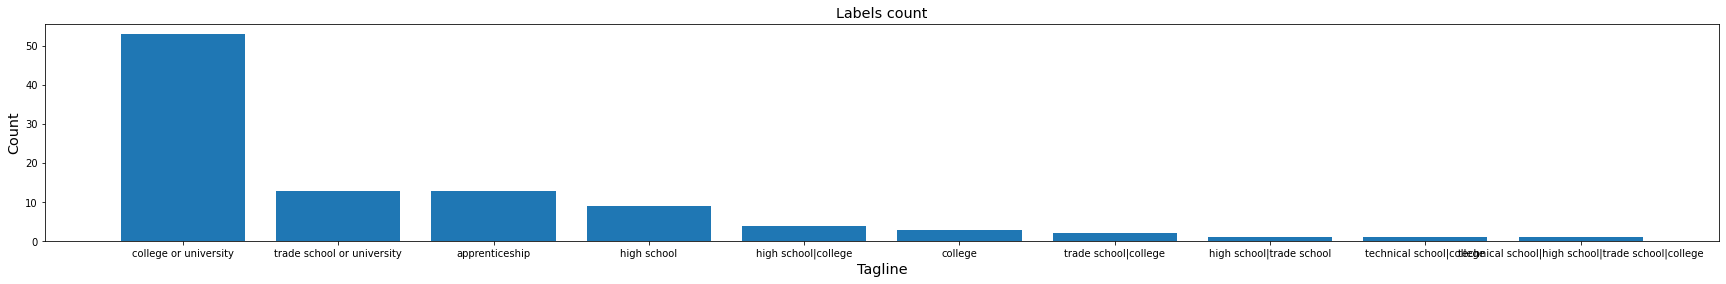

In [68]:
### Write your answer here ###
temp_salary_arange = data_cleaned.sort_values(by = ['min_ENTRY_SALARY_GEN', 'max_ENTRY_SALARY_DWP'], ascending = False)
ind = temp_salary_arange[temp_salary_arange['SCHOOL_TYPE'] == 0 ].index
temp_salary_arange.drop(ind , inplace=True)
temp_salary_arange = temp_salary_arange[:100]
temp_salary_arange
# temp_salary_arange = temp_salary_arange.drop(temp_salary_arange.index[temp_salary_arange['SCHOOL_TYPE'] == 0], inplace=True)
#temp_salary_arange
#df[df['Team'] != 'C']
fig, ax = plt.subplots(figsize=(30, 4))
plt.bar(temp_salary_arange['SCHOOL_TYPE'].astype(str).unique(), temp_salary_arange['SCHOOL_TYPE'].value_counts())
plt.title('Labels count', fontsize = 'x-large')
plt.ylabel('Count', fontsize = 'x-large')
plt.xlabel('Tagline', fontsize = 'x-large')
plt.show()

### <span style="color:brown">Q3:

What the best time in the year to be ready for a job applying in any experience level?

In [69]:
"""
Since, I need the time in which the most number of vacancies open, and the query needs the best time without specific
experience level. So, I believe that getting the number of the month over all the year. will the get the best time in year 
to everyone to be ready for job application.

So, by using this theory, and with the implementation of the next cells we can find that April is the month with most open 
vacancies over years.


"""

'\nSince, I need the time in which the most number of vacancies open, and the query needs the best time without specific\nexperience level. So, I believe that getting the number of the month over all the year. will the get the best time in year \nto everyone to be ready for job application.\n\nSo, by using this theory, and with the implementation of the next cells we can find that April is the month with most open \nvacancies over years.\n\n\n'

In [70]:
### Write your answer here ###
date_df = pd.DataFrame()
x = list()
for i in range(len(data_cleaned)):
    if data_cleaned['OPEN_DATE'][i] == 0:
        x.append(0)
    else:
        x1 = data_cleaned['OPEN_DATE'][i].split('-')
        x.append(int(x1[0]))

date_df['month'] = x

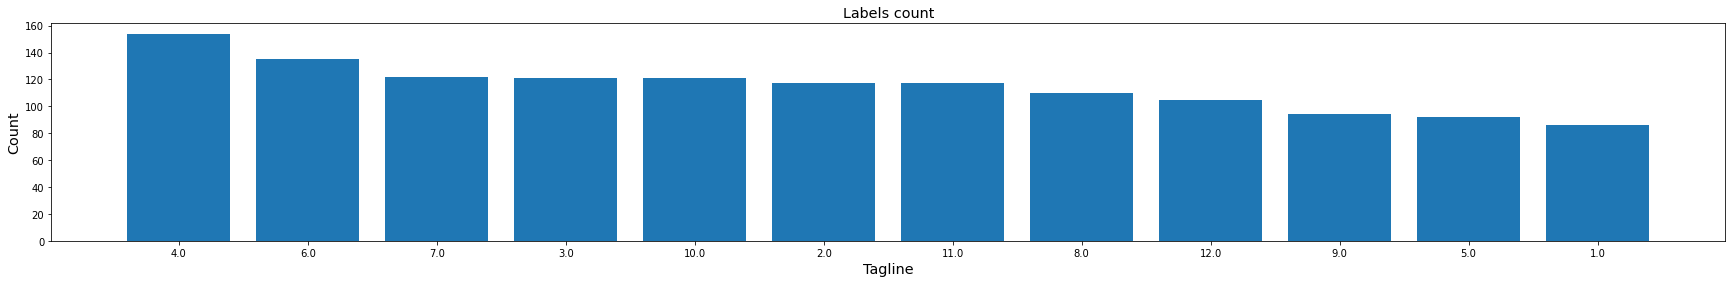

In [71]:
date_df['month'] = date_df['month'].replace({ 0 : np.rint(date_df['month'].mean())})
fig, ax = plt.subplots(figsize=(30, 4))
plt.bar(date_df['month'].astype(str).unique(), date_df['month'].value_counts())
plt.title('Labels count', fontsize = 'x-large')
plt.ylabel('Count', fontsize = 'x-large')
plt.xlabel('Tagline', fontsize = 'x-large')
plt.show()

### <span style="color:brown">Q4:

Is experience more important than educational level?

In [72]:
"""
To answer this question. we have to see which is better according to different aspects.
I believe that the first one to consider is the average amount of many you can again in the lowest time.
according to the first graph we can see that 2 years of study guarantee gaining money equal to 
approximately 3 years of experience.
but according to the second part. we can see that the there are many of the vacancies available depend on the amount of
experience years.

"""

'\nTo answer this question. we have to see which is better according to different aspects.\nI believe that the first one to consider is the average amount of many you can again in the lowest time.\naccording to the first graph we can see that 2 years of study guarantee gaining money equal to \napproximately 3 years of experience.\nbut according to the second part. we can see that the there are many of the vacancies available depend on the amount of\nexperience years.\n\n'

In [73]:
### Write your answer here ###
exp_edu_df = pd.DataFrame()
exp_edu_df['EDUCATION_YEARS'] = data_cleaned['EDUCATION_YEARS']
exp_edu_df['EXPERIENCE_LENGTH'] = data_cleaned['EXPERIENCE_LENGTH']
exp_edu_df['jobs'] = data_cleaned['JOB_CLASS_NO']
exp_edu_df['salary_min'] = data_cleaned['min_ENTRY_SALARY_GEN']
exp_edu_df['salary_max'] = data_cleaned['max_ENTRY_SALARY_DWP']
exp_edu_df

,EDUCATION_YEARS,EXPERIENCE_LENGTH,jobs,salary_min,salary_max
0,0.0,1.0,9206.0,125175,155514
1,0.0,4.0,9206.0,125175,155514
2,0.0,8.0,9206.0,125175,155514
3,4.0,0.0,1513.0,125175,155514
4,0.0,2.0,1223.0,125175,155514
...,...,...,...,...,...
1369,4.0,1.0,4300.0,125175,155514
1370,0.0,2.0,4300.0,125175,155514
1371,4.0,1.0,4290.0,125175,155514
1372,0.0,2.0,4290.0,125175,155514


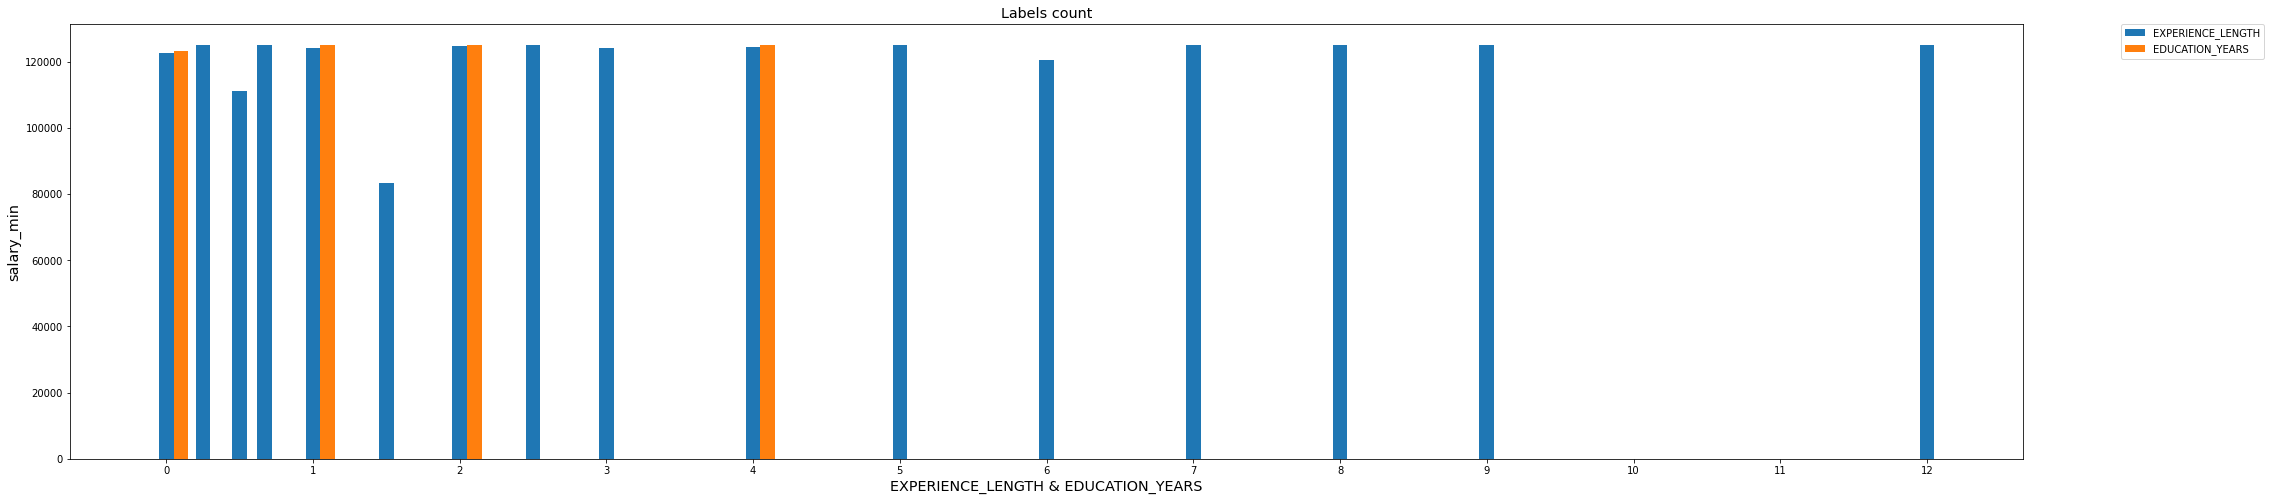

In [74]:
# According to the amount of money

width = 0.1
x = np.arange(len(exp_edu_df['EXPERIENCE_LENGTH'].unique()))
temp_df = exp_edu_df.groupby('EXPERIENCE_LENGTH', as_index = False)['salary_min'].mean()
temp_df2 = exp_edu_df.groupby('EDUCATION_YEARS', as_index = False)['salary_min'].mean()
fig, ax = plt.subplots(figsize=(35, 8))
plt.xticks(x, np.arange(0, 16))
ax.bar(temp_df['EXPERIENCE_LENGTH'].unique(), temp_df['salary_min'], width, label='EXPERIENCE_LENGTH')
ax.bar(temp_df2['EDUCATION_YEARS'].unique()+width, temp_df2['salary_min'], width, label='EDUCATION_YEARS')
plt.title('Labels count', fontsize = 'x-large')
plt.ylabel('salary_min', fontsize = 'x-large')
plt.xlabel('EXPERIENCE_LENGTH & EDUCATION_YEARS', fontsize = 'x-large')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

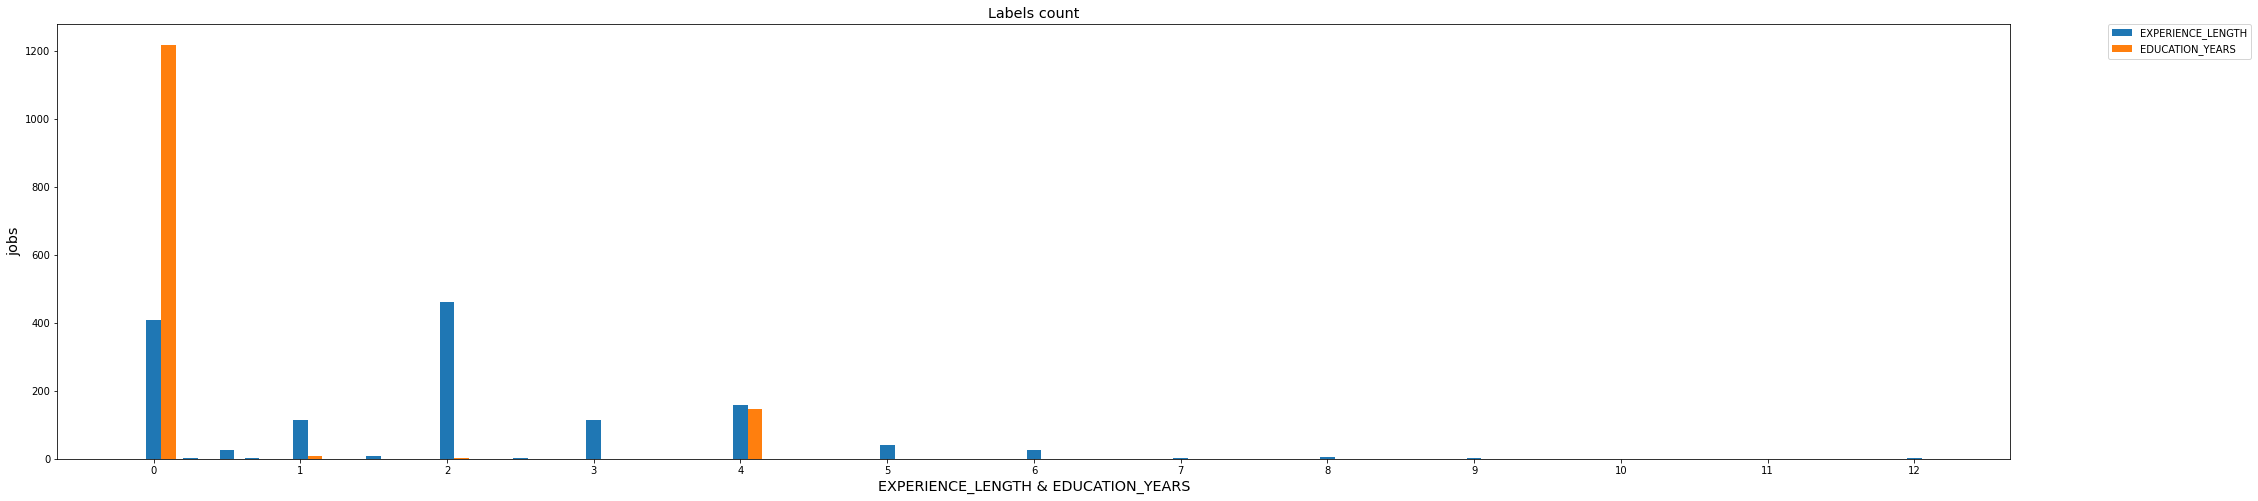

In [75]:
# According to the number of available jobs
width = 0.1
x = np.arange(len(temp_df['EXPERIENCE_LENGTH'].unique()))
temp_df = exp_edu_df.groupby('EXPERIENCE_LENGTH', as_index = False)['jobs'].count()
temp_df2 = exp_edu_df.groupby('EDUCATION_YEARS', as_index = False)['jobs'].count()
fig, ax = plt.subplots(figsize=(35, 8))
plt.xticks(x, np.arange(0, 16))
ax.bar(temp_df['EXPERIENCE_LENGTH'].unique(), temp_df['jobs'], width, label='EXPERIENCE_LENGTH')
ax.bar(temp_df2['EDUCATION_YEARS'].unique()+width, temp_df2['jobs'], width, label='EDUCATION_YEARS')
plt.title('Labels count', fontsize = 'x-large')
plt.ylabel('jobs', fontsize = 'x-large')
plt.xlabel('EXPERIENCE_LENGTH & EDUCATION_YEARS', fontsize = 'x-large')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### <span style="color:brown">Q5:

Which fresh grade job that will guarantee many job offers in the future for him?

In [76]:
"""
by getting the job names, that requires zero experience. And getting the possible future jobs based on the same condition too,
to match both categories. then grouping by the job name and count the jobs dependent on it. I found that Park Ranger job
gets the most jobs dependent on it.

"""

'\nby getting the job names, that requires zero experience. And getting the possible future jobs based on the same condition too,\nto match both categories. then grouping by the job name and count the jobs dependent on it. I found that Park Ranger job\ngets the most jobs dependent on it.\n\n'

In [77]:
fresh_grade_df = pd.DataFrame()
fresh_grade_df['job_name'] = data_cleaned.loc[data_cleaned['EXPERIENCE_LENGTH'] == 0, 'JOB_CLASS_TITLE']
fresh_grade_df['future_job_name'] = data_cleaned.loc[data_cleaned['EXPERIENCE_LENGTH'] == 0, 'EXP_JOB_CLASS_TITLE']
ind = fresh_grade_df[fresh_grade_df['future_job_name'] == 0 ].index
fresh_grade_df.drop(ind, inplace = True)
x = fresh_grade_df.groupby('job_name', as_index = False)['future_job_name'].count()
x = x.sort_values(by = ['future_job_name'], ascending = False, ignore_index = True)
x[:1]

,job_name,future_job_name
0,Park Ranger,4


### <span style="color:brown">Q6:

"The City of Los Angeles does not discriminate on the basis of race, religion, national origin, sex, age, marital status, sexual orientation, gender identity, gender expression, disability, creed, color, ancestry, medical condition (cancer), or Acquired Immune Deficiency Syndrome.

AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER 
"

The above statment is qouted from one of the job descriptions.

Based on the jobs requirments column above do you think that LA governate may bais a little for men over women or the applicant marital status for example may effect his chance to gain the job?

In [78]:
"""
I believe that this statement is true. According to analysis done over the the two columns ('REQUIREMENT_SET_TEXT', 'JOB_DUTIES')
the first one is the job publication requirements and the second one is the responsibilitites of the applicants.
there is no any thing mentioned in both of them related to the marital status or the gender of the applicant.
So, I believe they really do not care his\her private life.
"""

"\nI believe that this statement is true. According to analysis done over the the two columns ('REQUIREMENT_SET_TEXT', 'JOB_DUTIES')\nthe first one is the job publication requirements and the second one is the responsibilitites of the applicants.\nthere is no any thing mentioned in both of them related to the marital status or the gender of the applicant.\nSo, I believe they really do not care his\\her private life.\n"

In [79]:
from nltk.corpus import stopwords # --> NLP ("a, an, at, to, is, are, by, from, the")
from nltk import word_tokenize
import re

stop_words = stopwords.words("english")

In [80]:
### Write your answer here ###
x = 0
for i in data_cleaned['REQUIREMENT_SET_TEXT']:
    raw_text = re.findall(r"[a-zA-Z]+", i) # --> Regex
    raw_text = " ".join(raw_text).lower()
    tokens = word_tokenize(raw_text)
    tokens = [token for token in tokens if token not in stop_words]
    if 'male' in tokens:
        print(x)
    elif 'female' in tokens:
        print(x)
    elif 'single' in tokens:
        print(x)
    elif 'married' in tokens:
        print(x)
    
    x += 1

935
975


In [81]:
print(data_cleaned['REQUIREMENT_SET_TEXT'][935])
print(data_cleaned['REQUIREMENT_SET_TEXT'][975])

Possession of a valid Multiple Subject Teaching Credential or Single Subject Teaching Credential issued by the California Commission on Teacher Credentialing.
Five years of full-time paid experience in the application of composition shingle, tile, modified roll roofing, single-ply systems, or "built-up" roofing.


In [82]:
x = 0
for i in data_cleaned['JOB_DUTIES'].astype(str):
    raw_text = re.findall(r"[a-zA-Z]+", i)
    raw_text = " ".join(raw_text).lower()
    tokens = word_tokenize(raw_text)
    tokens = [token for token in tokens if token not in stop_words]
    if 'male' in tokens:
        print(x)
    elif 'female' in tokens:
        print(x)
    elif 'single' in tokens:
        print(x)
    elif 'married' in tokens:
        print(x)
    
    x += 1

578
579
580
654
900
901
974
975
1118


In [83]:
print(data_cleaned['JOB_DUTIES'][578])
print('\n')
print(data_cleaned['JOB_DUTIES'][578])
print('\n')
print(data_cleaned['JOB_DUTIES'][578])
print('\n')
print(data_cleaned['JOB_DUTIES'][578])
print('\n')
print(data_cleaned['JOB_DUTIES'][578])
print('\n')
print(data_cleaned['JOB_DUTIES'][578])
print('\n')
print(data_cleaned['JOB_DUTIES'][578])
print('\n')
print(data_cleaned['JOB_DUTIES'][578])
print('\n')
print(data_cleaned['JOB_DUTIES'][578])
print('\n')
print(data_cleaned['JOB_DUTIES'][578])

A Forensic Print Specialist obtains latent prints at crime scenes; fingerprints dead bodies and processes fingers severed from dead bodies for fingerprint identification; uses various chemicals to process latent prints, including laser application; compares single, partial, and distorted finger and palm latent prints with exemplar prints; takes plaster cast impressions; and appears in court as an expert witness in latent print matters. Prepares and enters latent fingerprints into the Department's Automated Fingerprint Identification System (AFIS).


A Forensic Print Specialist obtains latent prints at crime scenes; fingerprints dead bodies and processes fingers severed from dead bodies for fingerprint identification; uses various chemicals to process latent prints, including laser application; compares single, partial, and distorted finger and palm latent prints with exemplar prints; takes plaster cast impressions; and appears in court as an expert witness in latent print matters. Prep

## Good Luck